## Data Analysis with pandas

Each survey respondent was asked questions about what they typically eat for Thanksgiving, along with some demographic questions, like their gender, income, and location. This dataset will allow us to discover regional and income-based patterns in what Americans eat for Thanksgiving dinner.

Using this Thanksgiving survey data, we can answer quite a few interesting questions, like:

- Do people in Suburban areas eat more Tofurkey than people in Rural areas?
- Where do people go to Black Friday sales most often?
- Is there a correlation between praying on Thanksgiving and income?
- What income groups are most likely to have homemade cranberry sauce?

### Task 1 - Load Data

- Read about the [data set](https://github.com/fivethirtyeight/data/tree/master/thanksgiving-2015)
- Read in the data to pandas
- Check the shape of the dataframe and examine the different columns
- Check the summary statistics of the dataframe

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Read in the data to pandas
thanks = pd.read_csv('thanksgiving.csv', encoding = 'Latin-1')

#Check the shape of the dataframe and examine the different columns
print(thanks.shape)
print(thanks.columns)

#Check the summary statistics of the dataframe
print(thanks.describe(include = ['O']))


(1058, 65)
Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypic

### Task 2 - Initial Data Analysis

- Create a new dataframe that only includes people that celebrate Thanksgiving
- Find out what the most popular main dish is.
- Do people who eat Tofurkey also have gravy as a side dish (calculate proportions)?
- What is the most popular pie?
- How many pies are eaten other than Apple, Pecan and Pumpkin?
- Look at the age distribution.
- Write a function that approximates each respondent's age given the ranges and apply it to all cells (remember type conversion).
- Examine the summary statistics of the age column now.
- Look at the income distribution.
- Write a function that approximates each respondent's income given the ranges and apply it to all cells (remember type conversion).
- Examine the summary statistics of the income column now.
- Look at the distance traveled for lower income (< 50,000) vs. higher income (>150,000) respondents.
- Use the pivot_table function to examine what ages and incomes are more likely to "attend a Friendsgiving" or "meetup with hometown friends.


Turkey
0.6
Pumpkin
729
1135
count    1025.000000
mean       47.982439
std        19.366623
min        18.000000
25%        32.000000
50%        46.000000
75%        60.000000
max        90.000000
Name: Age, dtype: float64
count       889.000000
mean      97224.434196
std       93302.066754
min          45.000000
25%       37171.000000
50%       74064.000000
75%      119773.000000
max      498310.000000
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: float64
For people with lower income: 
Thanksgiving is happening at my home--I won't travel at all                         106
Thanksgiving is local--it will take place in the town I live in                      92
Thanksgiving is out of town but not too far--it's a drive of a few hours or less     64
Thanksgiving is out of town and far away--I have to drive several hours or fly       16
Name: How far will you travel for Thanksgiving?, dtype: int64
For people with higher income: 
Thanksgiving is

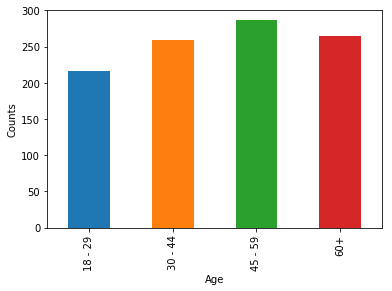

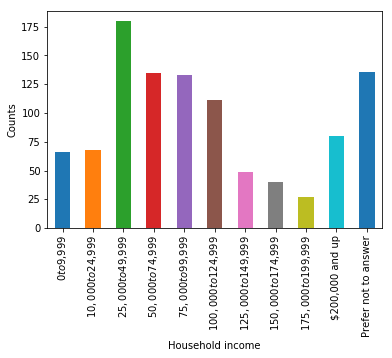

In [288]:
#Create a new dataframe that only includes people that celebrate Thanksgiving
thanks_yes = thanks.loc[thanks['Do you celebrate Thanksgiving?'] == 'Yes',]

#Find out what the most popular main dish is.
print(thanks_yes['What is typically the main dish at your Thanksgiving dinner?'].value_counts().idxmax())

#Do people who eat Tofurkey also have gravy as a side dish (calculate proportions)?
thanks_tofurkey = thanks_yes.loc[thanks_yes['What is typically the main dish at your Thanksgiving dinner?'] == 'Tofurkey',]
print(sum(thanks_tofurkey['Do you typically have gravy?'] == 'Yes')/thanks_tofurkey.shape[0])

#What is the most popular pie?
pie = ['Apple', 'Buttermilk', 'Cherry', 'Chocolate', 'Coconut cream', 'Key lime', 'Peach', 'Pecan', 'Pumpkin', 'Sweet Potato']
max = 0
for i in pie:  
    count = thanks_yes['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - {}'.format(i)].dropna().shape[0]
    if count > max:
        max = count
        ans = i
print(ans)
print(max)

#How many pies are eaten other than Apple, Pecan and Pumpkin?
pie_2 = ['Buttermilk', 'Cherry', 'Chocolate', 'Coconut cream', 'Key lime', 'Peach', 'Sweet Potato']
other_pie = thanks_yes['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify)'].dropna().shape[0]
count1 = 0
for j in pie_2:
    count1 += thanks_yes['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - {}'.format(i)].dropna().shape[0]
print(count1 + other_pie)

#Look at the age distribution.
thanks['Age'].dropna().value_counts().reindex(index = ['18 - 29', '30 - 44', '45 - 59', '60+']).plot(kind = 'bar')
plt.xlabel('Age')
plt.ylabel('Counts')

#Write a function that approximates each respondent's age given the ranges and apply it to all cells (remember type conversion).
from random import randint
def age(df):
    for i in range(df.shape[0]):
        if df.loc[i, 'Age'] == '18 - 29':
            df.loc[i, 'Age'] = randint(18, 29)
        elif df.loc[i, 'Age'] == '30 - 44':
            df.loc[i, 'Age'] = randint(30, 44)
        elif df.loc[i, 'Age'] == '45 - 59':
            df.loc[i, 'Age'] = randint(45, 59)
        elif df.loc[i, 'Age'] == '60+':
            df.loc[i, 'Age'] = randint(60, 90)
        else:
            df.loc[i, 'Age'] = np.nan
    return df

thanks_age = age(thanks.copy())

#Examine the summary statistics of the age column now.
print(thanks_age['Age'].dropna().astype('int').describe())

#Look at the income distribution.
money = ['$0 to $9,999', '$10,000 to $24,999','$25,000 to $49,999', '$50,000 to $74,999', '$75,000 to $99,999', '$100,000 to $124,999',
        '$125,000 to $149,999', '$150,000 to $174,999', '$175,000 to $199,999', '$200,000 and up', 'Prefer not to answer']
plt.figure()
temp = 'How much total combined money did all members of your HOUSEHOLD earn last year?'
thanks[temp].dropna().value_counts().reindex(index = money).plot(kind = 'bar')
plt.xlabel('Household income')
plt.ylabel('Counts')

#Write a function that approximates each respondent's income given the ranges and apply it to all cells (remember type conversion).
def income(df):
    for i in range(df.shape[0]):
        if df.loc[i, temp] == '$0 to $9,999':
            df.loc[i, temp] = randint(0, 9999)
        elif df.loc[i, temp] == '$10,000 to $24,999':
            df.loc[i, temp] = randint(10000, 24999)
        elif df.loc[i, temp] == '$25,000 to $49,999':
            df.loc[i, temp] = randint(25000, 49999)
        elif df.loc[i, temp] == '$50,000 to $74,999':
            df.loc[i, temp] = randint(50000, 74999)
        elif df.loc[i, temp] == '$75,000 to $99,999':
            df.loc[i, temp] = randint(75000, 99999)
        elif df.loc[i, temp] == '$100,000 to $124,999':
            df.loc[i, temp] = randint(100000, 124999)
        elif df.loc[i, temp] == '$125,000 to $149,999':
            df.loc[i, temp] = randint(125000, 149999)
        elif df.loc[i, temp] == '$150,000 to $174,999':
            df.loc[i, temp] = randint(150000, 174999)
        elif df.loc[i, temp] == '$175,000 to $199,999':
            df.loc[i, temp] = randint(175000, 199999)
        elif df.loc[i, temp] == '$200,000 and up':
            df.loc[i, temp] = randint(200000, 500000)
        else:
            df.loc[i, temp] = np.nan
    return df        
thanks_income = income(thanks.copy())

#Examine the summary statistics of the income column now.
print(thanks_income[temp].dropna().astype('int').describe())

#Look at the distance traveled for lower income (< 50,000) vs. higher income (>150,000) respondents.
print('For people with lower income: ')
print(thanks_income.loc[thanks_income[temp] < 50000,'How far will you travel for Thanksgiving?'].value_counts())
print('For people with higher income: ')
print(thanks_income.loc[thanks_income[temp] > 150000,'How far will you travel for Thanksgiving?'].value_counts())

### Task 3 - Visualization

matplotlib
- Use groupby to examine the breakdown of income by type of cranberry sauce
- Use agg to compute the mean and plot the results in a bar chart
- Use agg to find the average income of people who eat "Homemade" cranberry sauce and "Tofurkey"
- Choose an appropriate plot or chart to visualize the results

int32
What type of cranberry saucedo you typically have?
Canned                     94134.768182
Homemade                  112127.506073
None                       88180.655462
Other (please specify)    109727.478261
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: float64


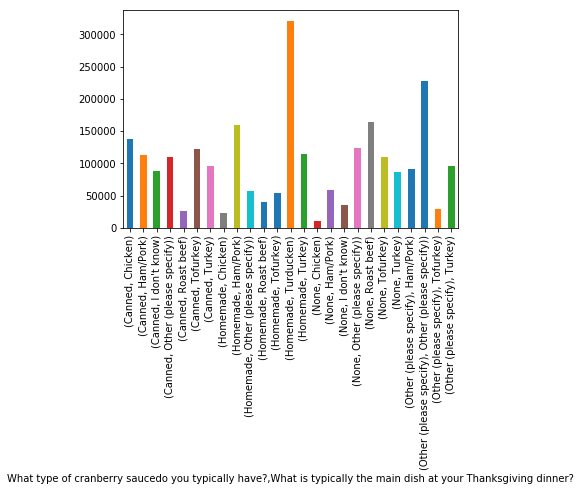

In [289]:
#Use groupby to examine the breakdown of income by type of cranberry sauce
thanks_income_num = thanks_income.copy().loc[~(pd.isnull(thanks_income[temp])),]
thanks_income_num[temp] = thanks_income_num[temp].astype('int')
grouped = thanks_income_num.groupby('What type of cranberry saucedo you typically have?')
print(thanks_income_num[temp].dtypes)
print(grouped[temp].agg(np.mean))

#Use agg to compute the mean and plot the results in a bar chart
grouped[temp].agg(np.mean).plot(kind = 'bar')

#Use agg to find the average income of people who eat "Homemade" cranberry sauce and "Tofurkey"
grouped2 = thanks_income_num.groupby(['What type of cranberry saucedo you typically have?',
                                      'What is typically the main dish at your Thanksgiving dinner?'])

t = grouped2.agg(np.mean)

#Choose an appropriate plot or chart to visualize the results
t[temp].plot(kind = 'bar')



